# 4D-STEM Data Processing: *Large FOV Tungsten Sulfide - Tungsten Selenide Superlattice Lateral Heterojunction*

In [1]:
"""Import the python script containing the helper functions and classes"""
from proc4D import *

C:\Users\haloe\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


---

## 1. Data Loading and Preprocessing

### 1.1. (Optional) Raw Data

Below, we load the **raw**  $\text{WS}_2$-$\text{WSe}_2$ superlattice dataset and preprocess it. Preprocessing steps include *alignment* and *elliptical distortion correction*.

Optionally, we may skip this subsection (1.1) and load the **pre-processed** data in section (1.2) directly.

In [63]:
"""Load raw dataset and instantiate as a HyperData object."""

ws2se2_filepath = '03_62kx_CL1p5m_50umapt_spot9_rot37_x512_y512.npy' #Adjust as necessary
ws2se2_superlattice = HyperData(np.load(ws2se2_filepath, mmap_mode='r+')[:256,:256])

print('The shape of the 4D dataset (ny, nx, ky, kx): ', ws2se2_superlattice.data.shape)
print('Dataset type: ', ws2se2_superlattice.data.dtype)

The shape of the 4D dataset (ny, nx, ky, kx):  (256, 256, 124, 124)
Dataset type:  float32


In [64]:
"""Alignment: ensure the center beam across the diffraction patterns is the same."""

# First determine whether alignment is needed by running the centerBeam_Stats method
ws2se2_superlattice.centerBeam_Stats();

Mean CoM Coordinate (ky, kx): [63.63205856 62.03453845]
Standard Deviation of CoM Coordinates (ky, kx): [0.15656516 0.56182973] px


In [59]:
# If alignment is needed, we run the following...
alignment_radius = 7 #px
alignment_iterations = 1 # Some datasets may need more than 1 iteration to center the beam.

for i in range(alignment_iterations):
    print(f'Center beam alignment, iteration {i+1}...')
    ws2se2_superlattice = ws2se2_superlattice.alignment(alignment_radius)[0]
    print()

Center beam alignment, iteration 1...


Computing centers of mass: 100%|██████████| 256/256 [00:03<00:00, 76.07it/s]


Processing 256 by 256 real-space positions...


Computing centers of mass: 100%|██████████| 256/256 [00:02<00:00, 107.62it/s]



Standard deviation statistics (ky, kx): (0.0092, 0.0066)
COM (ky, kx): (62.0008, 62.0338)



We know visualize the mean diffraction pattern by using the **show** method.

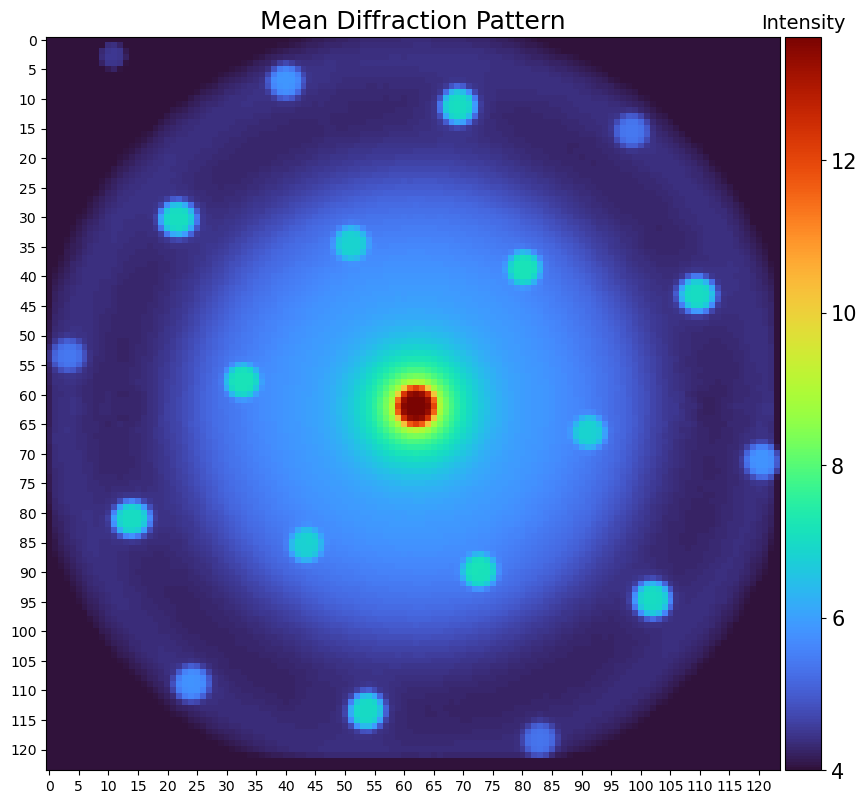

In [54]:
ws2se2_superlattice.get_dp(special='mean').show(title='Mean Diffraction Pattern',logScale=True, vmin=4)

In [55]:
"""Elliptical Distortion Correction"""

# We define an annular region which will be used to fit the diffraction pattern data
r_minor = 45 #px from center
R_major = 55 #px from center

# We first determine whether an elliptical correction is needed
ws2se2_superlattice.fix_elliptical_distortions(r=r_minor, R=R_major, return_fix=False)

Ellipse rotation = -70.98630170668517 degrees 
Major axis 'a' = 51.69871535262246 px 
Minor axis 'b' = 51.358471538708436 px


In [56]:
# If elliptical distortion is needed, we run the following:
ws2se2_superlattice = ws2se2_superlattice.fix_elliptical_distortions(r=r_minor, R=R_major, interp_method='linear', return_fix=True)

print("\nElliptical stats after correction:")
ws2se2_superlattice.fix_elliptical_distortions(r=r_minor-1, R=R_major+1, return_fix=False)

Ellipse rotation = -70.98219666130936 degrees 
Major axis 'a' = 51.69868091227578 px 
Minor axis 'b' = 51.35850568264562 px

Elliptical stats after correction:
Ellipse rotation = -76.6869391389519 degrees 
Major axis 'a' = 51.709370344964995 px 
Minor axis 'b' = 51.67652285844172 px


In [ ]:
# Save preprocessed dataset
fname_processedData = 'ws2_wse2_superlattice_processed_data.npy'
np.save(fname_processedData, ws2se2_superlattice.data)

### 1.2. Preprocessed Data

If section **1.1** was skipped, then **do not** skip this section. Otherwise skip. 

In [ ]:
# Load preprocessed dataset
fname_processedData = 'ws2_wse2_superlattice_processed_data.npy'
ws2se2_superlattice = HyperData(np.load(fname_processedData))

In [27]:
"""[Optional] Run py4D-browser to visualize the aligned 4D dataset."""

import subprocess

np.save(fname_processedData, ws2se2_superlattice.data) # Save aligned dataset
command = ['py4DGUI', fname_processedData] 
result = subprocess.run(command, stdout=subprocess.PIPE, stderr=subprocess.PIPE)

---

## 2. Denoising

### 2.1. Spatial Filters

### 2.2. Transform Domain Filters

### 2.3. Tensor Decomposition Filters

### 2.4. Supervised Machine Learning

---

## 3. Strain Mapping